In [1]:
#https://analyticsindiamag.com/roc-auc-curve-for-comprehensive-analysis-of-machine-learning-models/

In [9]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc


In [10]:
df = pd.read_csv('diabetes.csv')
print(df)

      Pregnancies  Glucose  ...  Age  Outcome
0               2      138  ...   47        1
1               0       84  ...   23        0
2               0      145  ...   31        1
3               0      135  ...   24        1
4               1      139  ...   21        0
...           ...      ...  ...  ...      ...
1995            2       75  ...   33        0
1996            8      179  ...   36        1
1997            6       85  ...   42        0
1998            0      129  ...   26        1
1999            2       81  ...   25        0

[2000 rows x 9 columns]


In [11]:
#df.columns
df.columns=['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [12]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [13]:
X = df.values[:,0:8]
Y = df.values[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=1)

In [14]:
clf1 = LogisticRegression()
clf2 = svm.SVC(kernel='linear', probability=True)
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()

In [16]:
probas_1 = clf1.fit(X_train,y_train).predict_proba(X_test)
probas_2 = clf2.fit(X_train,y_train).predict_proba(X_test)
probas_3 = clf3.fit(X_train,y_train).predict_proba(X_test)
probas_4 = clf4.fit(X_train,y_train).predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
probas_1

array([[0.69854241, 0.30145759],
       [0.23357812, 0.76642188],
       [0.85677654, 0.14322346],
       ...,
       [0.9022557 , 0.0977443 ],
       [0.91052095, 0.08947905],
       [0.9456594 , 0.0543406 ]])

In [19]:
fp1, tp1, thresholds1 = roc_curve(y_test, probas_1[:, 1])
roc_auc_model1 = auc(fp1, tp1)

fp2, tp2, thresholds2 = roc_curve(y_test, probas_2[:, 1])
roc_auc_model2 = auc(fp2, tp2)

fp3, tp3, thresholds3 = roc_curve(y_test, probas_3[:, 1])
roc_auc_model3 = auc(fp3, tp3)

fp4, tp4, thresholds4 = roc_curve(y_test, probas_4[:, 1])
roc_auc_model4 = auc(fp4, tp4)

print("AUC for Logistic Regression Model : ",roc_auc_model1)
print("AUC for SVM Model:", roc_auc_model2)
print("AUC for Random Forest Model :" ,roc_auc_model3)
print("AUC for Decision Tree model :", roc_auc_model4)

AUC for Logistic Regression Model :  0.8297607952780367
AUC for SVM Model: 0.8248668458563511
AUC for Random Forest Model : 0.9655847751799777
AUC for Decision Tree model : 0.8746977862420141


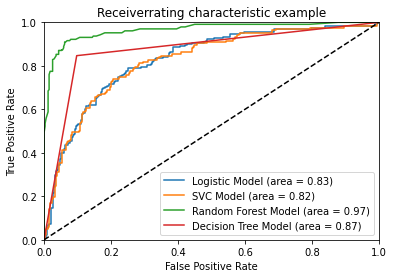

In [23]:
import matplotlib.pyplot as pl
pl.clf()
pl.plot(fp1, tp1, label='Logistic Model (area = %0.2f)' % roc_auc_model1)
pl.plot(fp2, tp2, label='SVC Model (area = %0.2f)' % roc_auc_model2)
pl.plot(fp3, tp3, label='Random Forest Model (area = %0.2f)' % roc_auc_model3)
pl.plot(fp4, tp4, label='Decision Tree Model (area = %0.2f)' % roc_auc_model4)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()